In [1]:
import pandas as pd
import plotly.express as px
import plotly

### Map of number of physicians per 1000 people

In [15]:
df = pd.read_csv("../data/merged_dataset.csv", index_col=0)
df.head()

,zipcode,population,sqkm,lat,lon,population_density,physicians_count,physicians_density,physicians_per_1000_people
0,80331,4741,0.782770,48.13575,11.57351,6056.696092,174,222.287517,36.701118
1,80333,11265,1.615148,48.14495,11.56824,6974.593040,102,63.152107,9.054594
2,80335,9042,1.697719,48.14657,11.55112,5325.969728,71,41.820820,7.852245
3,80336,8103,1.568529,48.13101,11.55228,5165.986730,108,68.854321,13.328397
4,80337,15280,1.046991,48.12675,11.55904,14594.203771,51,48.711020,3.337696


In [18]:
# sort by physicians_per_1000_people in descending order
df.sort_values(by="physicians_per_1000_people", ascending=False, inplace=True)

In [44]:
df.to_csv("../data/merged_sorted_dataset.csv")

In [28]:
max = df.head(1)["physicians_per_1000_people"].values[0]
max

36.70111790761442

In [29]:
min = df.tail(1)["physicians_per_1000_people"].values[0]
min

0.1851052014561609

In [37]:
df["reverse_physicians_per_1000_people"] = 1 / df["physicians_per_1000_people"]
#df["reverse_physicians_per_1000_people"] = df["physicians_per_1000_people"].apply(lambda x: max - x + min)
df.head()

,zipcode,population,sqkm,lat,lon,population_density,physicians_count,physicians_density,physicians_per_1000_people,reverse_physicians_per_1000_people
0,80331,4741,0.782770,48.13575,11.57351,6056.696092,174,222.287517,36.701118,0.027247
3,80336,8103,1.568529,48.13101,11.55228,5165.986730,108,68.854321,13.328397,0.075028
1,80333,11265,1.615148,48.14495,11.56824,6974.593040,102,63.152107,9.054594,0.110441
21,80801,9242,0.469850,48.15916,11.57902,19670.107481,76,161.753751,8.223328,0.121605
2,80335,9042,1.697719,48.14657,11.55112,5325.969728,71,41.820820,7.852245,0.127352


In [38]:
df.tail()

,zipcode,population,sqkm,lat,lon,population_density,physicians_count,physicians_density,physicians_per_1000_people,reverse_physicians_per_1000_people
35,80997,22698,10.930837,48.19279,11.48446,2076.510701,8,0.731874,0.352454,2.837250
54,81543,19962,2.943451,48.10830,11.56503,6781.835335,7,2.378161,0.350666,2.851714
41,81249,17519,24.899701,48.16514,11.38836,703.582746,6,0.240967,0.342485,2.919833
60,81671,17950,2.293257,48.12326,11.61188,7827.295414,6,2.616366,0.334262,2.991667
33,80993,16207,2.401043,48.18670,11.52141,6749.983236,3,1.249457,0.185105,5.402333


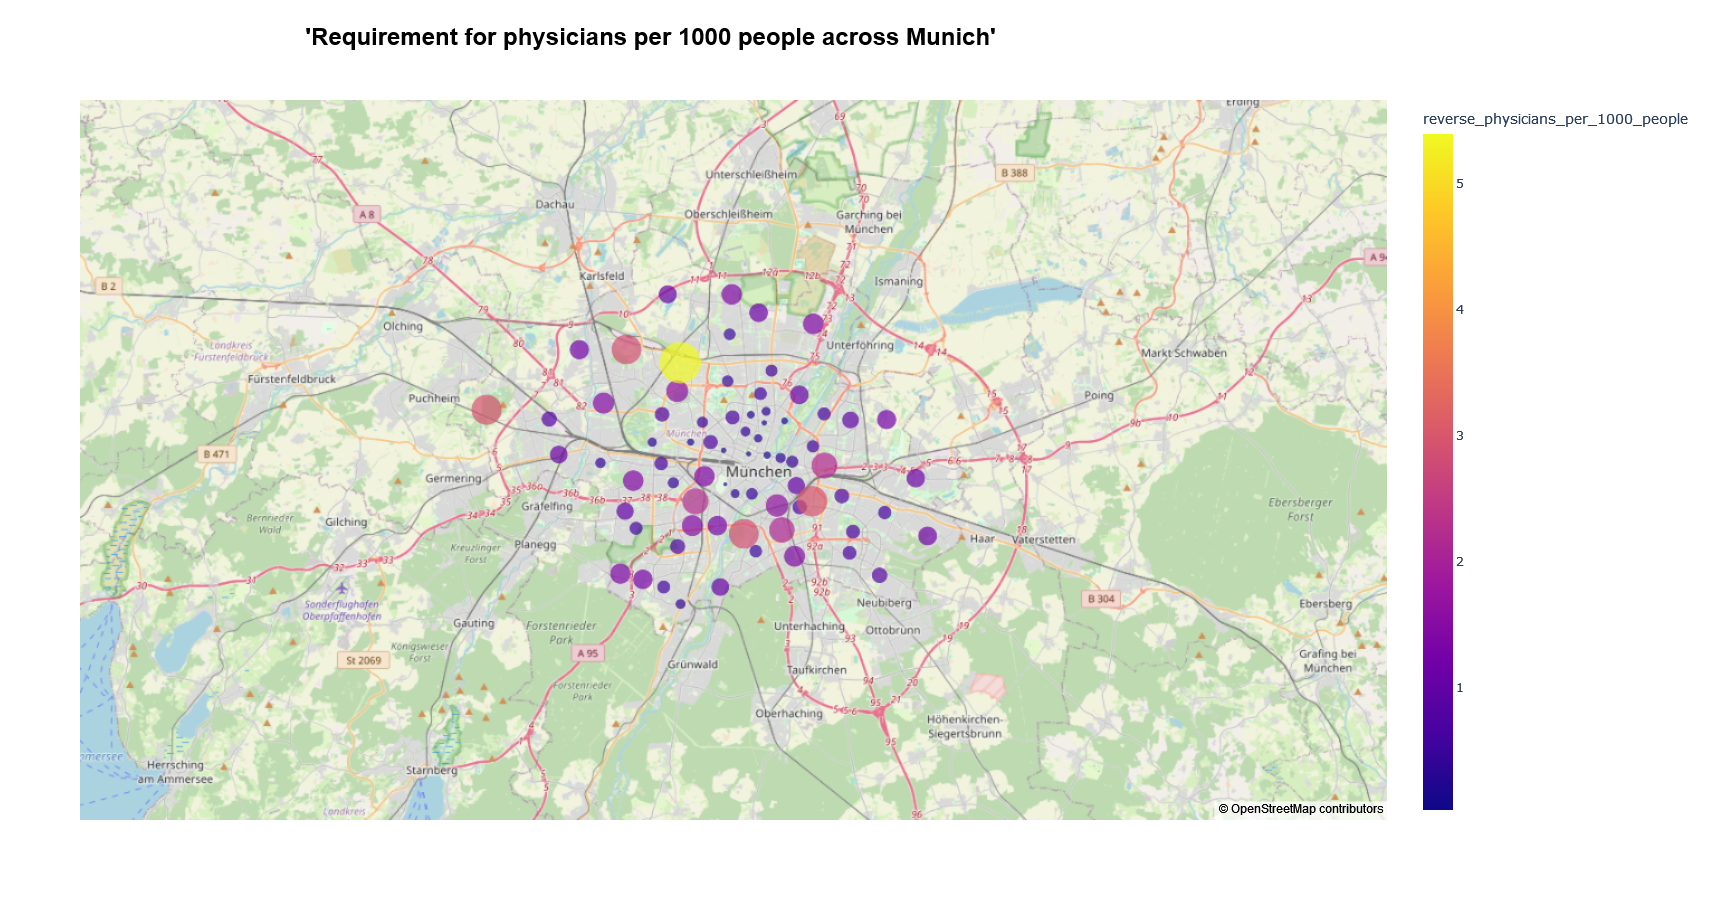

In [43]:
fig = px.scatter_mapbox(df,
                        lat='lat',
                        lon='lon',
                        color='reverse_physicians_per_1000_people',
                        size='reverse_physicians_per_1000_people',
                        size_max=30,
                        hover_name='zipcode',
                        hover_data=['zipcode', 'population', 'physicians_count', 'physicians_per_1000_people'],
                        zoom=10,
                        title="<b>'Requirement for physicians per 1000 people across Munich'</b>",
                        color_discrete_sequence=px.colors.qualitative.Plotly
                       )

fig.update_layout(
                    title={"font_size":20,
                           "xanchor":"center", "x":0.38,
                           "yanchor":"bottom", "y":0.95},
                    title_font=dict(size=24, color='Black', family='Arial, sans-serif'),
                    height=900,
                    width=1300,
                    autosize=True,
                    hovermode='closest',
                    mapbox=dict(
                        style='open-street-map'
                    ),
                    legend_title_text='1 / physicians per 1000 people' # TODO
)

fig.show()